In [134]:
!pip install pmdarima

In [135]:
from google.colab import files
uploaded = files.upload()

Saving BF_ETE_DATASET.csv to BF_ETE_DATASET (1).csv


In [137]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
warnings.filterwarnings('ignore')

In [138]:
# Load the uploaded CSV file
df = pd.read_csv('BF_ETE_DATASET.csv')
print(df.head())

       Date  SPX Index  (L1)  INVIXN Index  (R1)  SPX Index - INVIXN Index  \
0  31/08/14          2003.37             13.0675                 1990.3025   
1  30/09/14          1972.29             13.1450                 1959.1450   
2  31/10/14          2018.05             13.2950                 2004.7550   
3  30/11/14          2067.56             12.8975                 2054.6626   
4  31/12/14          2058.90             15.1200                 2043.7800   

   Exchange Rate (USD to INR)  
0                   78.074402  
1                   75.393422  
2                   78.925590  
3                   71.865701  
4                   78.036721  


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        121 non-null    object 
 1   SPX Index  (L1)             121 non-null    float64
 2   INVIXN Index  (R1)          121 non-null    float64
 3   SPX Index - INVIXN Index    121 non-null    float64
 4   Exchange Rate (USD to INR)  121 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [140]:
df.describe()

,SPX Index (L1),INVIXN Index (R1),SPX Index - INVIXN Index,Exchange Rate (USD to INR)
count,121.000000,121.000000,121.000000,121.000000
mean,3228.025372,17.050558,3210.974840,74.798401
std,1018.476418,6.237864,1018.574627,2.981009
min,1920.030000,10.412500,1900.405000,70.055221
25%,2362.720000,13.222500,2349.847400,71.987157
50%,2941.760000,16.045000,2924.002400,74.937956
75%,4131.930000,19.162500,4112.515100,77.607850
max,5634.610000,64.407500,5621.057600,79.868869


In [141]:
 df.isnull().sum()

,0
Date,0
SPX Index (L1),0
INVIXN Index (R1),0
SPX Index - INVIXN Index,0
Exchange Rate (USD to INR),0


In [142]:
df.columns

Index(['Date', 'SPX Index  (L1)', 'INVIXN Index  (R1)',
       'SPX Index - INVIXN Index', 'Exchange Rate (USD to INR)'],
      dtype='object')

In [143]:
# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

In [144]:
# Set "Invoice Date" as the index
df.set_index('Date', inplace=True)

In [145]:
monthly_df = df.resample('M').mean()

In [146]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2014-08-31 to 2024-08-31
Freq: M
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPX Index  (L1)             121 non-null    float64
 1   INVIXN Index  (R1)          121 non-null    float64
 2   SPX Index - INVIXN Index    121 non-null    float64
 3   Exchange Rate (USD to INR)  121 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [147]:
# Create a new DataFrame with only "SPX Index - INVIXN Index" and "Exchange Rate (USD to INR)'" columns
df_new = monthly_df[['SPX Index - INVIXN Index', 'Exchange Rate (USD to INR)']]

In [148]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2014-08-31 to 2024-08-31
Freq: M
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPX Index - INVIXN Index    121 non-null    float64
 1   Exchange Rate (USD to INR)  121 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


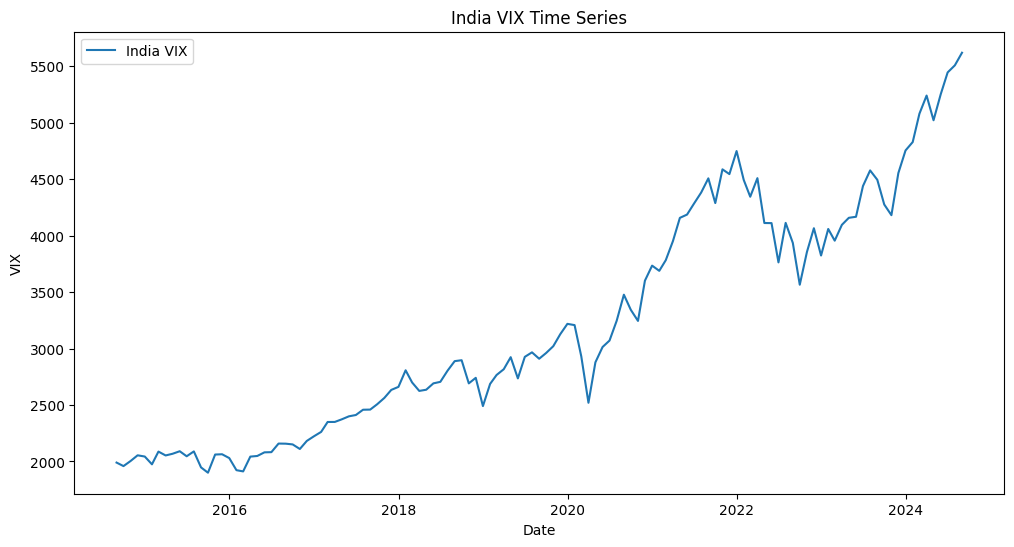

In [149]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_new['SPX Index - INVIXN Index'], label='India VIX')
plt.title('India VIX Time Series')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.legend()
plt.show()

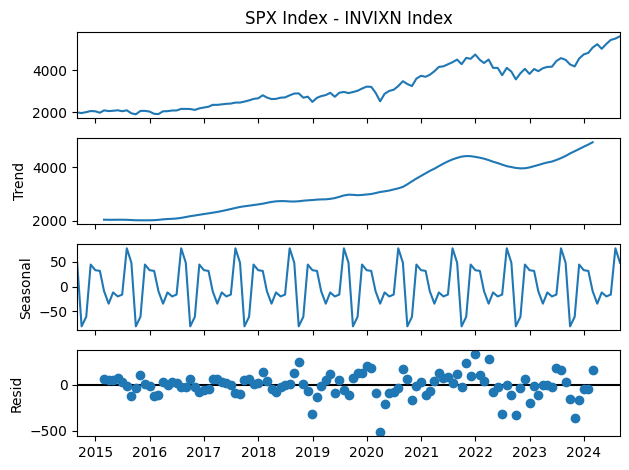

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame and 'India VIX' is the column name
decomposition = seasonal_decompose(df_new['SPX Index - INVIXN Index'], model='additive', period=12)
decomposition.plot()
plt.show()

In [151]:
# Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(df_new['SPX Index - INVIXN Index'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: 0.6993721357691675
p-value: 0.9898253311670063


In [152]:
df_new['SPX Index - INVIXN Index_diff'] = df_new['SPX Index - INVIXN Index'].diff().dropna()

# Re-run the ADF test on the differenced data
adf_test_diff = adfuller(df_new['SPX Index - INVIXN Index_diff'].dropna())
print(f'ADF Statistic (Differenced): {adf_test_diff[0]}')
print(f'p-value (Differenced): {adf_test_diff[1]}')

ADF Statistic (Differenced): -12.462452887553708
p-value (Differenced): 3.3823393822251235e-23


In [153]:
# Apply second-order differencing
df_new['SPX Index - INVIXN Index_diff2'] = df_new['SPX Index - INVIXN Index'].diff().diff().dropna()

# Re-run the ADF test on the second-order differenced data
adf_test_diff2 = adfuller(df_new['SPX Index - INVIXN Index_diff2'].dropna())
print(f'ADF Statistic (2nd Differenced): {adf_test_diff2[0]}')
print(f'p-value (2nd Differenced): {adf_test_diff2[1]}')

ADF Statistic (2nd Differenced): -8.639672327183987
p-value (2nd Differenced): 5.4691481408240154e-14


In [154]:
# Perform Box-Cox transformation
# Adding 1 to avoid issues with zero values (if your data contains zeros)
from scipy import stats
df_new['SPX Box-Cox'], lambda_value = stats.boxcox(df_new['SPX Index - INVIXN Index'] + 1)

In [155]:
# Print the estimated lambda value
print(f'Estimated Lambda: {lambda_value}')

Estimated Lambda: -0.31621621864612


In [156]:
#Check for stationarity using ADF test on the transformed series
adf_result_boxcox = adfuller(df_new['SPX Box-Cox'])
print(f'ADF Statistic (Box-Cox Transformed): {adf_result_boxcox[0]}')
print(f'p-value (Box-Cox Transformed): {adf_result_boxcox[1]}')

ADF Statistic (Box-Cox Transformed): -0.04696454926559599
p-value (Box-Cox Transformed): 0.9544714869384633


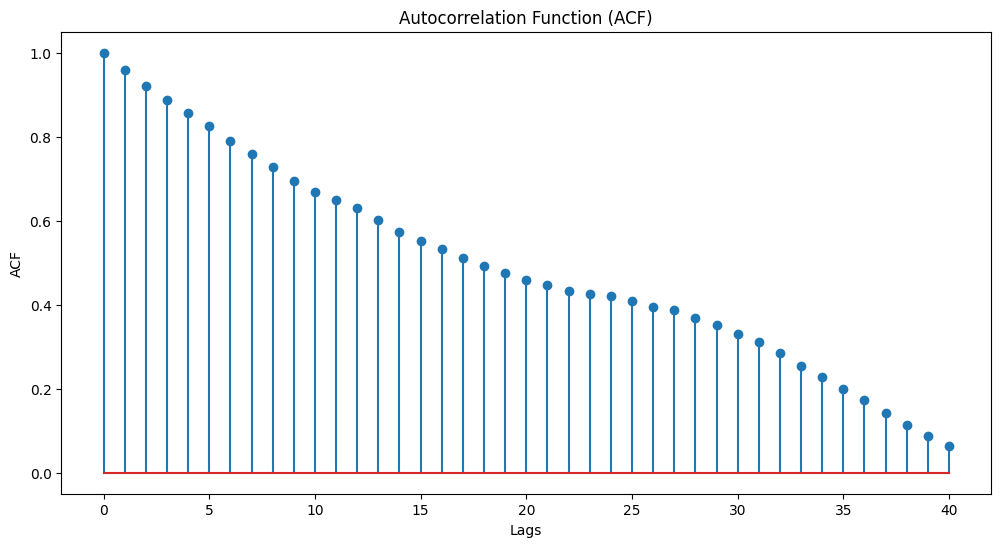

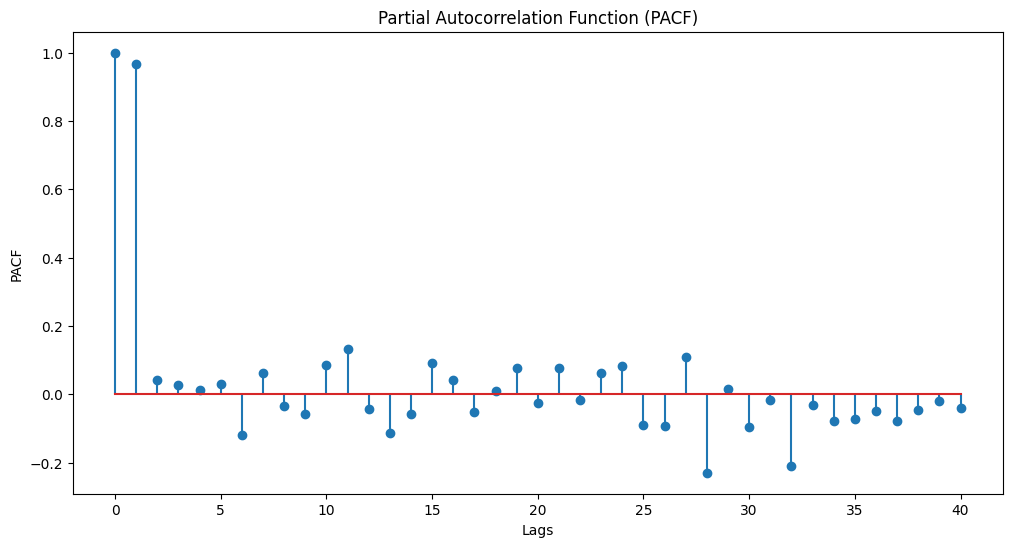

In [157]:
from statsmodels.tsa.stattools import acf, pacf

# Calculate ACF and PACF
acf_values = acf(df_new['SPX Index - INVIXN Index'].dropna(), nlags=40)
pacf_values = pacf(df_new['SPX Index - INVIXN Index'].dropna(), nlags=40)

# Plot ACF
plt.figure(figsize=(12, 6))
plt.stem(acf_values, use_line_collection=True)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plt.stem(pacf_values, use_line_collection=True)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# **RNN**

In [158]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_exog = MinMaxScaler(feature_range=(0, 1))

df['SPX Index - INVIXN Index'] = scaler_target.fit_transform(df[['SPX Index - INVIXN Index']])
df['Exchange Rate (USD to INR)'] = scaler_exog.fit_transform(df[['Exchange Rate (USD to INR)']])


In [159]:
# Convert data to sequences for RNN
def create_sequences(data, exog, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(np.column_stack((data[i:i+seq_length], exog[i:i+seq_length])))
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(df['SPX Index - INVIXN Index'].values,
                        df['Exchange Rate (USD to INR)'].values, seq_length)

In [160]:
# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 2)))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0846 - val_loss: 0.1820
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0421 - val_loss: 0.0724
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0353 - val_loss: 0.0223
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230 - val_loss: 0.0229
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0155 - val_loss: 0.0259
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - val_loss: 0.0138
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058 - val_loss: 0.0140
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - val_loss: 0.0078
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0115
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0040 - val_loss: 0.0071
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034 - val_loss: 0.0059
Epo

In [162]:
# Predict the next 12 months
n_future = 12

# Prepare future input sequence
future_X = X_test[-1].reshape(1, seq_length, 2)  # Take the last sequence as the starting point

# Prepare exogenous variable for the future (dummy values or forecasted exog)
exog_future = np.repeat(df['Exchange Rate (USD to INR)'].values[-1], n_future).reshape(-1, 1)

# Container for predictions
future_predictions = []

for i in range(n_future):
    # Predict the next value
    future_pred = rnn_model.predict(future_X)

    # Store the prediction
    future_predictions.append(future_pred[0, 0])

    # Update the input sequence with the predicted value and the next exogenous variable
    new_sequence = np.concatenate((future_X[:, 1:, :], np.array([[future_pred[0, 0], exog_future[i][0]]]).reshape(1, 1, 2)), axis=1) # Reshape the second array to (1, 1, 2) to match the shape of the first array
    future_X = new_sequence.reshape(1, seq_length, 2)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions)

# Denormalize predictions if normalization was applied
future_predictions = scaler_target.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


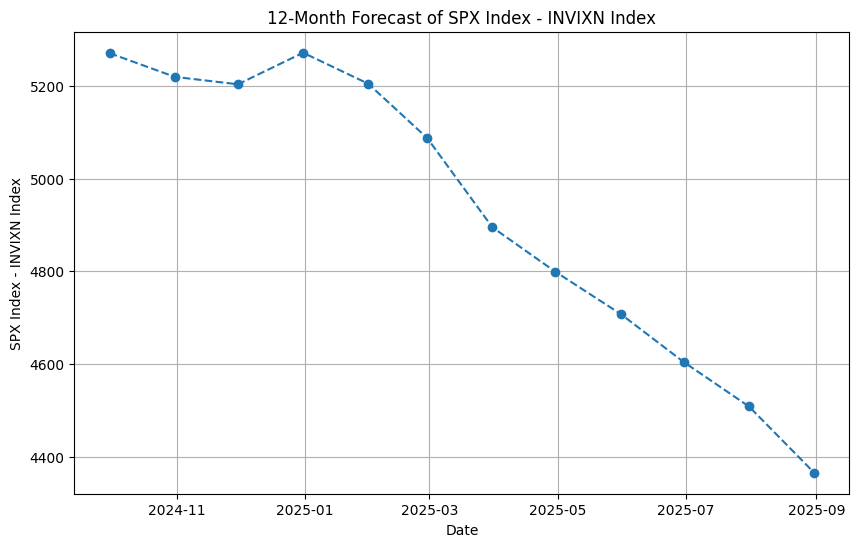

         Date  Predicted SPX-INVIXN
0  2024-09-30           5270.240234
1  2024-10-31           5219.143066
2  2024-11-30           5203.133789
3  2024-12-31           5271.219727
4  2025-01-31           5204.250977
5  2025-02-28           5087.201172
6  2025-03-31           4894.714844
7  2025-04-30           4798.795898
8  2025-05-31           4707.803223
9  2025-06-30           4604.140137
10 2025-07-31           4508.425293
11 2025-08-31           4365.572754


In [166]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range for the next 12 months
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions})

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], marker='o', linestyle='--')
plt.title('12-Month Forecast of SPX Index - INVIXN Index')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.grid(True)
plt.show()

# Print the predicted values
print(forecast_df)


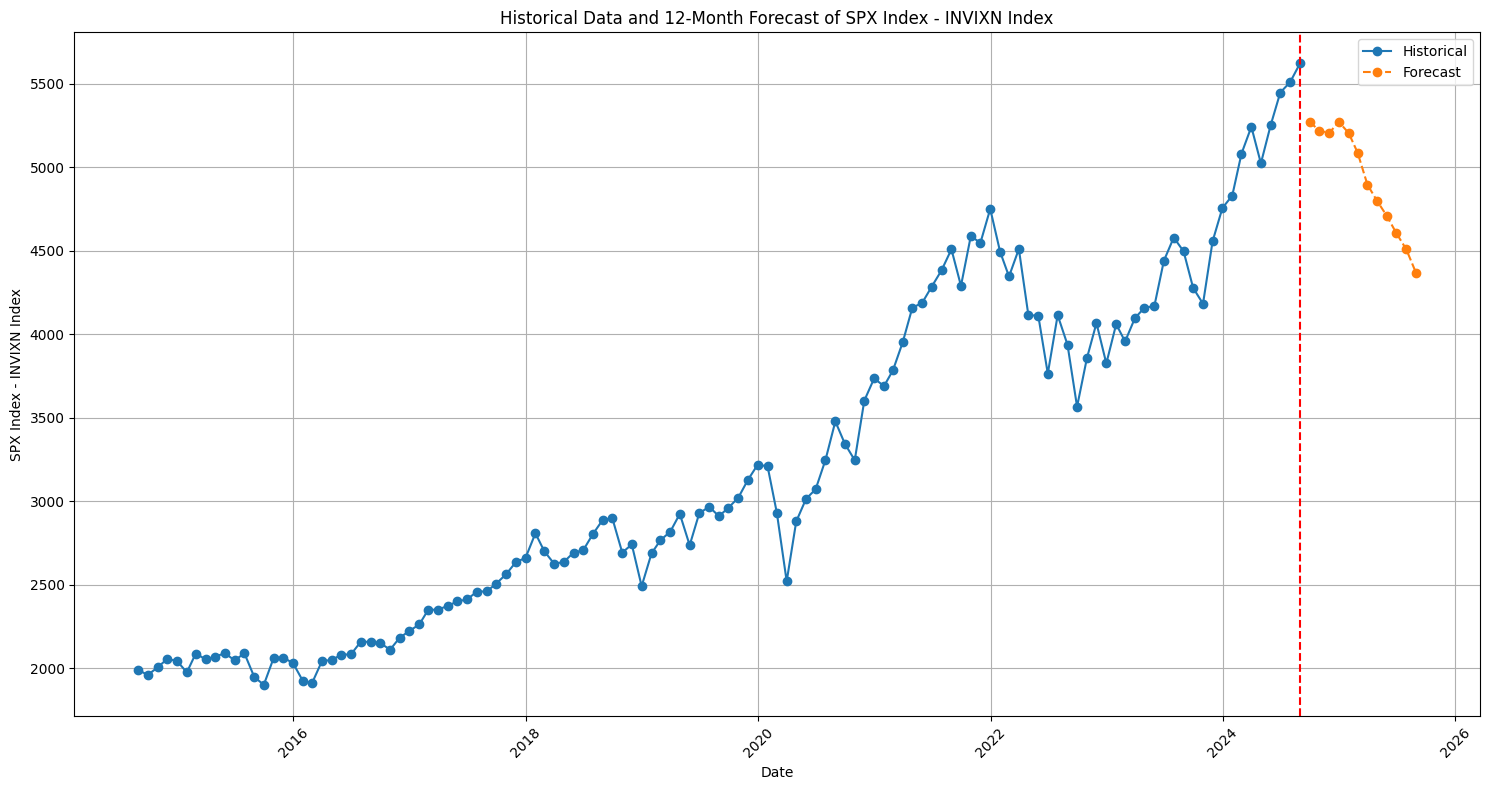

In [171]:
# Create a date range for the next 12 months
n_future = 12
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions.flatten()})

# Combine historical data and forecast
combined_df = pd.concat([df_new, forecast_df.set_index('Date')])

# Plot the historical data and predictions
plt.figure(figsize=(15, 8))
plt.plot(combined_df.index, combined_df['SPX Index - INVIXN Index'], label='Historical', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], label='Forecast', marker='o', linestyle='--')
plt.title('Historical Data and 12-Month Forecast of SPX Index - INVIXN Index')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical data and forecast
plt.axvline(x=pd.to_datetime('2024-08-31'), color='red', linestyle='--', label='Forecast Start')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = rnn_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE: 0.06990956796255014
MSE: 0.006992283275781344
RMSE: 0.08361987368910183


# **CNN**

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0668 - val_loss: 0.0069
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0266 - val_loss: 0.0532
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - val_loss: 0.0199
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0078 - val_loss: 0.0064
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - val_loss: 0.0155
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - val_loss: 0.0064
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049 - val_loss: 0.0118
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 - val_loss: 0.0121
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - val_loss: 0.0104
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0116
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0095
Epoch 13/

In [174]:
# Predict the next 12 months
n_future = 12

# Prepare future input sequence
future_X = X_test[-1].reshape(1, seq_length, 2)  # Take the last sequence as the starting point

# Prepare exogenous variable for the future (dummy values or forecasted exog)
exog_future = np.repeat(df['Exchange Rate (USD to INR)'].values[-1], n_future).reshape(-1, 1)

# Container for predictions
future_predictions = []

for i in range(n_future):
    # Predict the next value
    future_pred = cnn_model.predict(future_X)

    # Store the prediction
    future_predictions.append(future_pred[0, 0])

    # Update the input sequence with the predicted value and the next exogenous variable
    new_sequence = np.append(future_X[:, 1:, :], [[[future_pred[0, 0], exog_future[i][0]]]], axis=1) # Added extra brackets around future_pred and exog_future to ensure consistent dimensions
    future_X = new_sequence.reshape(1, seq_length, 2)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions)

# Denormalize predictions if normalization was applied
future_predictions = scaler_target.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


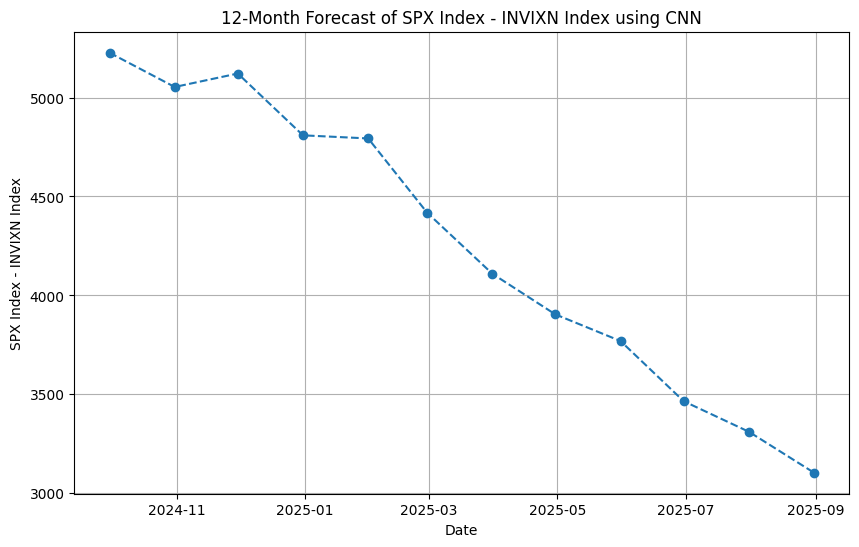

         Date  Predicted SPX-INVIXN
0  2024-09-30           5226.377930
1  2024-10-31           5053.278809
2  2024-11-30           5121.243652
3  2024-12-31           4808.920410
4  2025-01-31           4793.231934
5  2025-02-28           4418.393555
6  2025-03-31           4109.840820
7  2025-04-30           3904.115723
8  2025-05-31           3769.438477
9  2025-06-30           3465.444336
10 2025-07-31           3311.136475
11 2025-08-31           3104.055176


In [175]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range for the next 12 months
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions})

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], marker='o', linestyle='--')
plt.title('12-Month Forecast of SPX Index - INVIXN Index using CNN')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.grid(True)
plt.show()

# Print the predicted values
print(forecast_df)


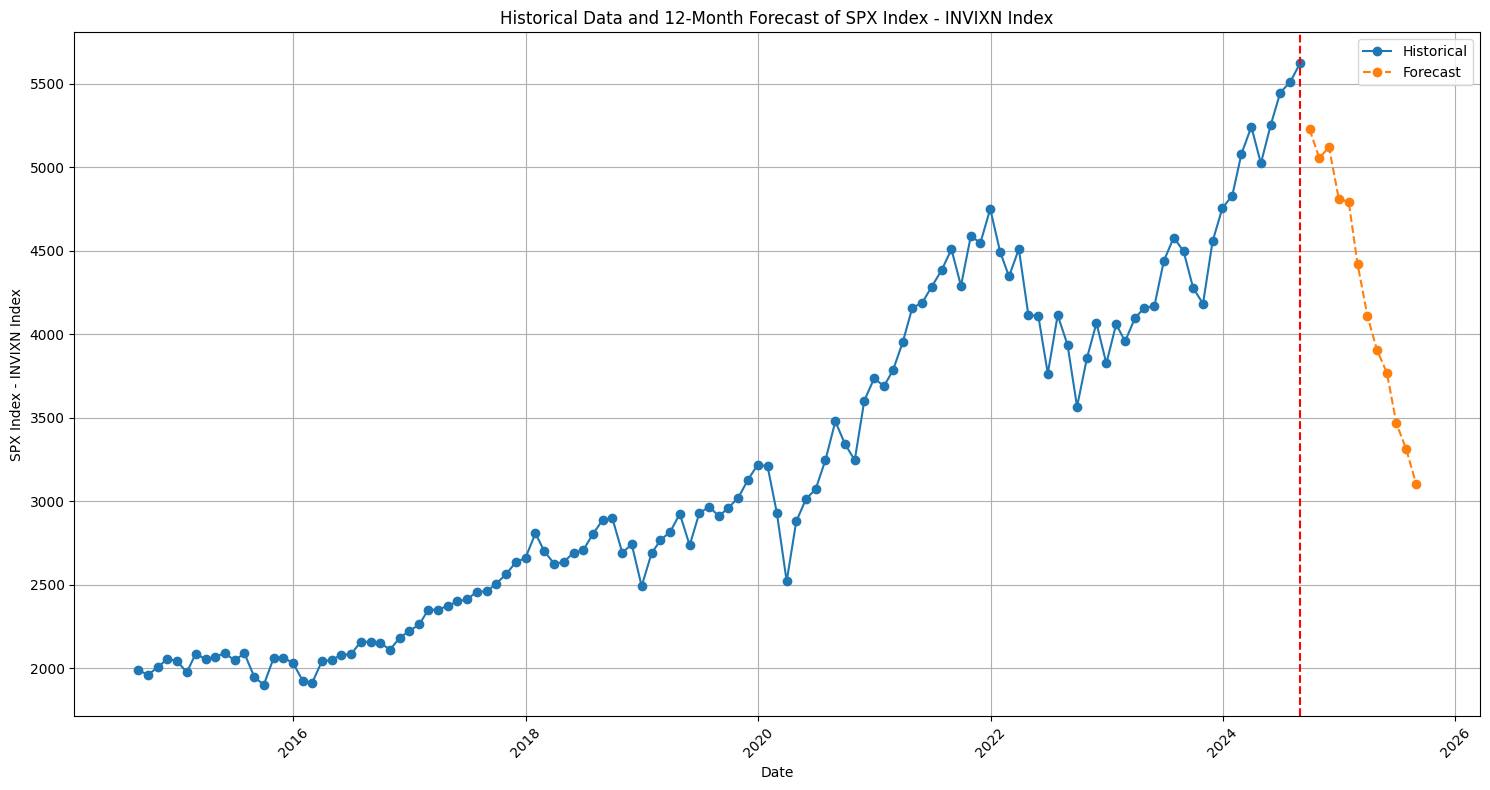

In [176]:
# Create a date range for the next 12 months
n_future = 12
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions.flatten()})

# Combine historical data and forecast
combined_df = pd.concat([df_new, forecast_df.set_index('Date')])

# Plot the historical data and predictions
plt.figure(figsize=(15, 8))
plt.plot(combined_df.index, combined_df['SPX Index - INVIXN Index'], label='Historical', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], label='Forecast', marker='o', linestyle='--')
plt.title('Historical Data and 12-Month Forecast of SPX Index - INVIXN Index')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical data and forecast
plt.axvline(x=pd.to_datetime('2024-08-31'), color='red', linestyle='--', label='Forecast Start')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = cnn_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
MAE: 0.11202524060375102
MSE: 0.014229315687762457
RMSE: 0.11928669535100073


# **LSTM**

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 2)))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))



Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - loss: 0.1077 - val_loss: 0.3540
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0628 - val_loss: 0.1898
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0376 - val_loss: 0.0556
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0292 - val_loss: 0.0606
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0177 - val_loss: 0.0656
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - val_loss: 0.0415
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0082 - val_loss: 0.0057
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - val_loss: 0.0085
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0066 - val_loss: 0.0123
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0062 - val_loss: 0.0141
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0055 - val_loss: 0.0228
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_loss: 0.0138


In [178]:
# Predict the next 12 months
n_future = 12

# Prepare future input sequence
future_X = X_test[-1].reshape(1, seq_length, 2)  # Take the last sequence as the starting point

# Prepare exogenous variable for the future (dummy values or forecasted exog)
exog_future = np.repeat(df['Exchange Rate (USD to INR)'].values[-1], n_future).reshape(-1, 1)

# Container for predictions
future_predictions = []

for i in range(n_future):
    # Predict the next value
    future_pred = lstm_model.predict(future_X)

    # Store the prediction
    future_predictions.append(future_pred[0, 0])

    # Update the input sequence with the predicted value and the next exogenous variable
    new_sequence = np.append(future_X[:, 1:, :], [[[future_pred[0, 0], exog_future[i][0]]]], axis=1) # Added extra brackets around future_pred[0,0], exog_future[i] to ensure the dimensions match for concatenation
    future_X = new_sequence.reshape(1, seq_length, 2)

# Convert predictions to numpy array
future_predictions = np.array(future_predictions)

# Denormalize predictions if normalization was applied
future_predictions = scaler_target.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


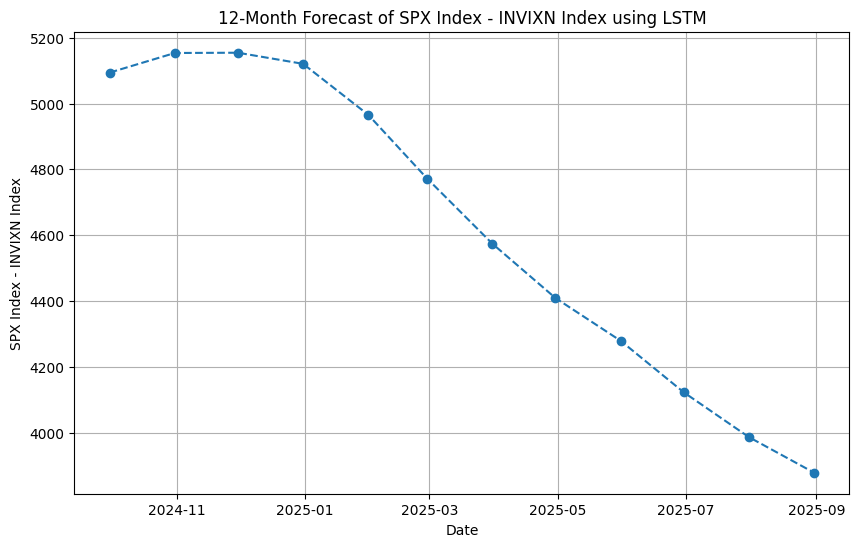

         Date  Predicted SPX-INVIXN
0  2024-09-30           5093.937988
1  2024-10-31           5153.546875
2  2024-11-30           5154.356445
3  2024-12-31           5120.544922
4  2025-01-31           4965.491211
5  2025-02-28           4771.750977
6  2025-03-31           4573.834961
7  2025-04-30           4408.770996
8  2025-05-31           4278.759766
9  2025-06-30           4122.218262
10 2025-07-31           3986.024414
11 2025-08-31           3877.935547


In [179]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date range for the next 12 months
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions})

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], marker='o', linestyle='--')
plt.title('12-Month Forecast of SPX Index - INVIXN Index using LSTM')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.grid(True)
plt.show()

# Print the predicted values
print(forecast_df)


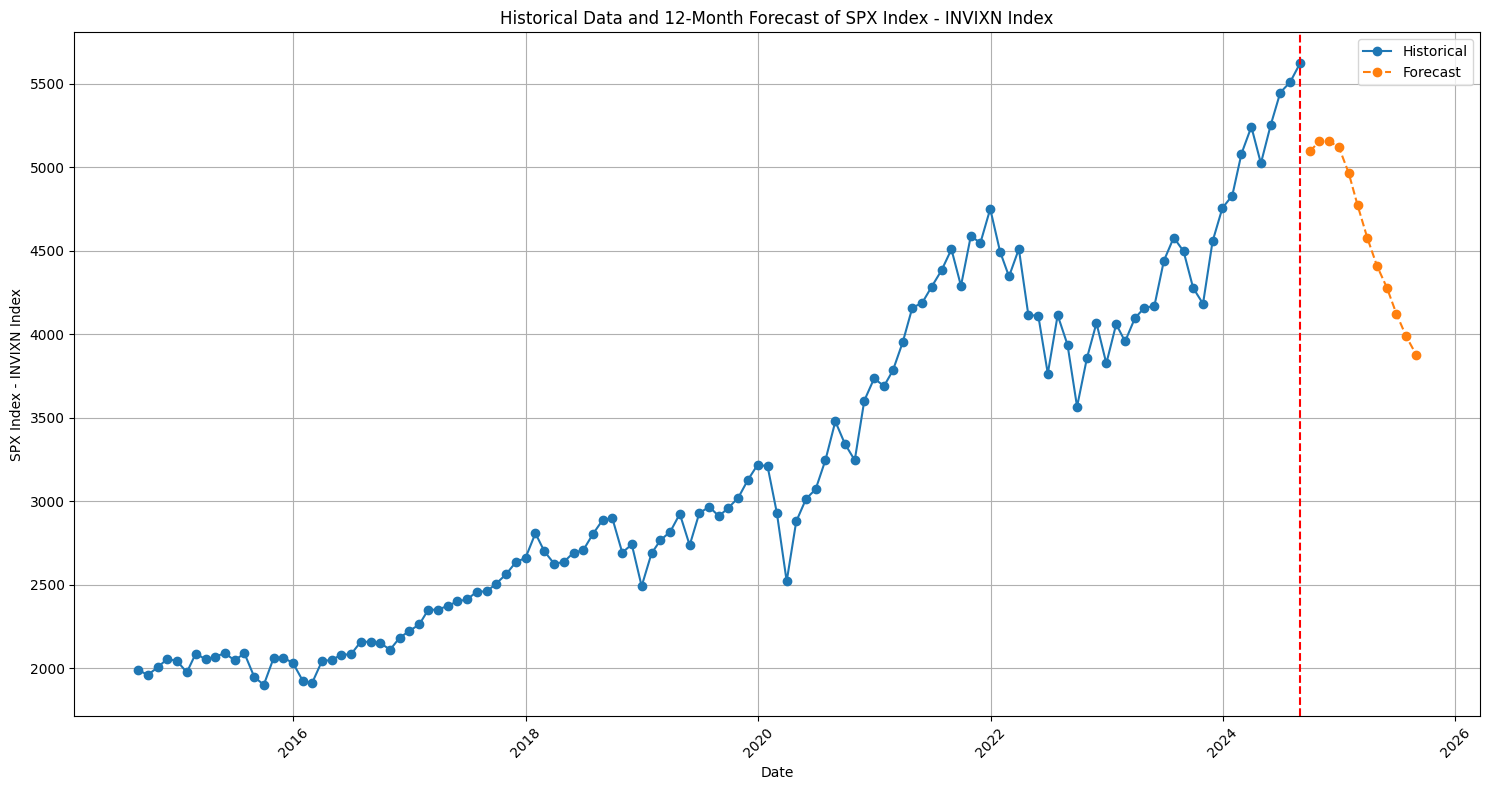

In [180]:
# Create a date range for the next 12 months
n_future = 12
date_range = pd.date_range(start='2024-09-01', periods=n_future, freq='M')

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame({'Date': date_range, 'Predicted SPX-INVIXN': future_predictions.flatten()})

# Combine historical data and forecast
combined_df = pd.concat([df_new, forecast_df.set_index('Date')])

# Plot the historical data and predictions
plt.figure(figsize=(15, 8))
plt.plot(combined_df.index, combined_df['SPX Index - INVIXN Index'], label='Historical', marker='o')
plt.plot(forecast_df['Date'], forecast_df['Predicted SPX-INVIXN'], label='Forecast', marker='o', linestyle='--')
plt.title('Historical Data and 12-Month Forecast of SPX Index - INVIXN Index')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical data and forecast
plt.axvline(x=pd.to_datetime('2024-08-31'), color='red', linestyle='--', label='Forecast Start')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = lstm_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
MAE: 0.10365029966572409
MSE: 0.015588546939954285
RMSE: 0.12485410261563007


# **CALCULATING AIC AND BIC**

In [ ]:
#AIC AND BIC FOR RNN
import numpy as np

# Number of parameters in the model
n_params_rnn = rnn_model.count_params()

# Number of data points
n_obs_rnn = len(y_test)

# Residual sum of squares (RSS)
rss_rnn = np.sum((y_test - y_pred.flatten()) ** 2)

# Calculate AIC
aic_rnn = n_obs_rnn * np.log(rss_rnn / n_obs_rnn) + 2 * n_params_rnn

# Calculate BIC
bic_rnn = n_obs_rnn * np.log(rss_rnn / n_obs_rnn) + np.log(n_obs_rnn) * n_params_rnn

print(f'RNN AIC: {aic_rnn}')
print(f'RNN BIC: {bic_rnn}')



RNN AIC: 5288.582928076546
RNN BIC: 8235.488594597356


In [ ]:
#AIC AND BIC FOR CNN
# Number of parameters in the model
n_params_cnn = cnn_model.count_params()

# Number of data points
n_obs_cnn = len(y_test)

# Calculate predictions
y_pred_cnn = cnn_model.predict(X_test) # Added this line to calculate predictions

# Residual sum of squares (RSS)
rss_cnn = np.sum((y_test - y_pred_cnn.flatten()) ** 2)

# Calculate AIC
aic_cnn = n_obs_cnn * np.log(rss_cnn / n_obs_cnn) + 2 * n_params_cnn

# Calculate BIC
bic_cnn = n_obs_cnn * np.log(rss_cnn / n_obs_cnn) + np.log(n_obs_cnn) * n_params_cnn

print(f'CNN AIC: {aic_cnn}')
print(f'CNN BIC: {bic_cnn}')# Number of parameters in the model
n_params_cnn = cnn_model.count_params()

# Number of data points
n_obs_cnn = len(y_test)

# Residual sum of squares (RSS)
rss_cnn = np.sum((y_test - y_pred_cnn.flatten()) ** 2)

# Calculate AIC
aic_cnn = n_obs_cnn * np.log(rss_cnn / n_obs_cnn) + 2 * n_params_cnn

# Calculate BIC
bic_cnn = n_obs_cnn * np.log(rss_cnn / n_obs_cnn) + np.log(n_obs_cnn) * n_params_cnn

print(f'CNN AIC: {aic_cnn}')
print(f'CNN BIC: {bic_cnn}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN AIC: 71148.44607893628
CNN BIC: 110012.46931001285
CNN AIC: 71148.44607893628
CNN BIC: 110012.46931001285


In [ ]:
#AIC AND BIC FOR LSTM
# Number of parameters in the model
n_params_lstm = lstm_model.count_params()

# Number of data points
n_obs_lstm = len(y_test)

# Calculate predictions and flatten the output
y_pred_lstm = lstm_model.predict(X_test).flatten() # Added this line to calculate predictions

# Residual sum of squares (RSS)
rss_lstm = np.sum((y_test - y_pred_lstm) ** 2)

# Calculate AIC
aic_lstm = n_obs_lstm * np.log(rss_lstm / n_obs_lstm) + 2 * n_params_lstm

# Calculate BIC
bic_lstm = n_obs_lstm * np.log(rss_lstm / n_obs_lstm) + np.log(n_obs_lstm) * n_params_lstm

print(f'LSTM AIC: {aic_lstm}')
print(f'LSTM BIC: {bic_lstm}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
LSTM AIC: 61610.453186292696
LSTM BIC: 95270.2039148501


# **ARIMAX**

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1836.330, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1680.944, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1777.011, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1651.401, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1642.527, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1620.962, Time=1.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1615.240, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1613.240, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1611.239, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1609.202, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1608.248, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1609.1

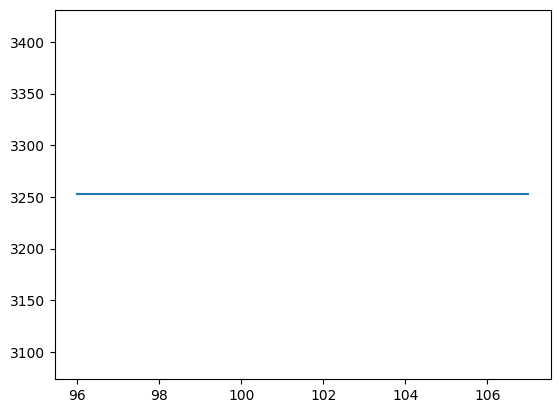

In [ ]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
y = df_new['SPX Index - INVIXN Index']
X = df_new[['Exchange Rate (USD to INR)']]
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed
model = auto_arima(
    y_train, # Use y directly
    exogenous=X_train[['Exchange Rate (USD to INR)']],
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    m=12, # Seasonality (if applicable)
    start_P=0, seasonal=False,
    d=None, D=None, trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Print the best model summary
print(model.summary())

# Forecast
forecast = model.predict(n_periods=12, exogenous=df_new[['Exchange Rate (USD to INR)']].iloc[-5:])
print(forecast)
plt.plot(forecast)

In [ ]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forecast using the length of y_test
forecast = model.predict(n_periods=len(y_test), exogenous=X_test[['Exchange Rate (USD to INR)']])

rmse = np.sqrt(mean_squared_error(y_test, forecast))
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)

# Calculate AIC and BIC (available from the model object)
aic = model.aic()
bic = model.bic()

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

RMSE: 959.6250806955404
MSE: 920880.2954999225
MAE: 816.3994052916668
AIC: 1608.2482574666128
BIC: 1613.3769538495485


# **ARCH MODEL**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 16.5 MB/s eta 0:00:00


In [ ]:
import arch
from arch import arch_model
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Assuming df1_new is your DataFrame
y = df_new['SPX Index - INVIXN Index']
X = df_new[['Exchange Rate (USD to INR)']]

In [ ]:
# Split data into training and testing sets
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

Forecasted Values from 09/24 to 08/25:
            Forecast Mean  Forecast Variance  Forecast Std Dev
2024-09-30    3267.205453       9.899858e+05        994.980311
2024-10-31    3267.205453       1.029825e+06       1014.802865
2024-11-30    3267.205453       1.032904e+06       1016.319089
2024-12-31    3267.205453       1.033143e+06       1016.436202
2025-01-31    3267.205453       1.033161e+06       1016.445255
2025-02-28    3267.205453       1.033162e+06       1016.445954
2025-03-31    3267.205453       1.033162e+06       1016.446009
2025-04-30    3267.205453       1.033162e+06       1016.446013
2025-05-31    3267.205453       1.033162e+06       1016.446013
2025-06-30    3267.205453       1.033162e+06       1016.446013
2025-07-31    3267.205453       1.033162e+06       1016.446013
2025-08-31    3267.205453       1.033162e+06       1016.446013


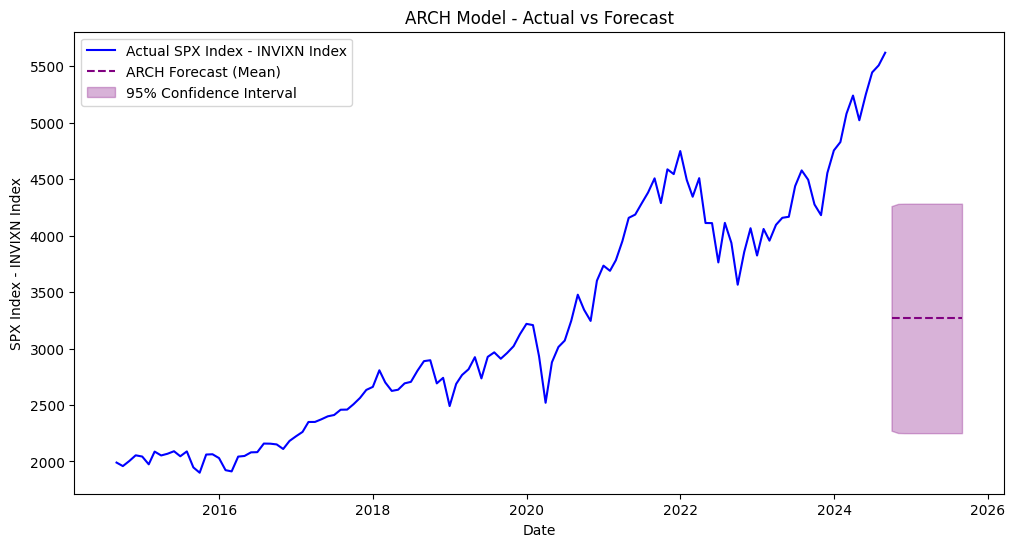

                         Constant Mean - ARCH Model Results                         
Dep. Variable:     SPX Index - INVIXN Index   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -802.154
Distribution:                        Normal   AIC:                           1610.31
Method:                  Maximum Likelihood   BIC:                           1618.00
                                              No. Observations:                   96
Date:                      Thu, Sep 05 2024   Df Residuals:                       95
Time:                              08:50:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

In [ ]:
# Define forecast horizon
forecast_start_date = pd.Timestamp('2024-09-01')
forecast_end_date = pd.Timestamp('2025-08-31')
forecast_steps = (forecast_end_date - forecast_start_date).days // 30 + 1  # Approximate number of months

# Forecasting the next periods
arch_forecast = arch_result.forecast(horizon=forecast_steps)

# Convert forecasted mean and variance to pandas Series with proper datetime index
forecast_index = pd.date_range(start=forecast_start_date,
                               end=forecast_end_date, freq='M')

# Ensure the forecasted values have the same length as the index
arch_mean = pd.Series(arch_forecast.mean.iloc[-1].values[:len(forecast_index)], index=forecast_index)
arch_variance = pd.Series(arch_forecast.variance.iloc[-1].values[:len(forecast_index)], index=forecast_index)

# Print forecasted values
forecast_df = pd.DataFrame({
    'Forecast Mean': arch_mean,
    'Forecast Variance': arch_variance,
    'Forecast Std Dev': arch_variance**0.5
})
print("Forecasted Values from 09/24 to 08/25:")
print(forecast_df)

# Plotting ARCH Forecast
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual SPX Index - INVIXN Index', color='blue')
plt.plot(arch_mean.index, arch_mean, label='ARCH Forecast (Mean)', color='purple', linestyle='--')
plt.fill_between(arch_mean.index,
                 arch_mean - arch_variance**0.5,
                 arch_mean + arch_variance**0.5,
                 color='purple', alpha=0.3, label='95% Confidence Interval')
plt.title('ARCH Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.legend()
plt.show()

# Print ARCH Summary
print(arch_result.summary())

In [ ]:
#Compute In-Sample Errors
# Ensure that fitted values are generated for the entire dataset 'y'
fitted_values = arch_result.conditional_volatility

# Align the lengths of 'y' and 'fitted_values' by slicing 'y'
in_sample_mse = mean_squared_error(y[-len(fitted_values):], fitted_values)
in_sample_rmse = np.sqrt(in_sample_mse)
in_sample_mae = mean_absolute_error(y[-len(fitted_values):], fitted_values)

print(f"In-Sample MSE: {in_sample_mse:.4f}")
print(f"In-Sample RMSE: {in_sample_rmse:.4f}")
print(f"In-Sample MAE: {in_sample_mae:.4f}")

# Compute Out-of-Sample Errors
# Align the forecast index with the actual data for comparison
actual_values = y[-forecast_steps:]  # Assuming you have actual values to compare

if len(actual_values) == len(forecast_index):
    forecast_mse = mean_squared_error(actual_values, arch_mean[:len(actual_values)])
    forecast_rmse = np.sqrt(forecast_mse)
    forecast_mae = mean_absolute_error(actual_values, arch_mean[:len(actual_values)])

    print(f"Forecast MSE: {forecast_mse:.4f}")
    print(f"Forecast RMSE: {forecast_rmse:.4f}")
    print(f"Forecast MAE: {forecast_mae:.4f}")
else:
    print("Length of actual values and forecast index do not match. Cannot compute forecast errors.")

# Retrieve AIC and BIC from the ARCH model results
aic = arch_result.aic
bic = arch_result.bic

print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")

In-Sample MSE: 7099019.6894
In-Sample RMSE: 2664.3986
In-Sample MAE: 2500.1921
Length of actual values and forecast index do not match. Cannot compute forecast errors.
AIC: 1610.3073
BIC: 1618.0004


# **GARCH MODEL**

In [ ]:
# Extract target variable and exogenous variable
y = df_new['SPX Index - INVIXN Index']
# X = df1_new[['Exchange Rate (USD to INR)']]  # Exogenous variable (not used directly in GARCH model)

# Fit GARCH model on the target variable
garch_model_fit = arch_model(y, vol='Garch', p=1, q=1, rescale=False)
garch_result = garch_model_fit.fit(disp='off')

# Define forecast horizon
forecast_start_date = pd.Timestamp('2024-09-01')
forecast_end_date = pd.Timestamp('2025-08-31')
# Calculate the number of months using a more precise method
forecast_steps = len(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='M'))

# Forecasting the next periods
garch_forecast = garch_result.forecast(horizon=forecast_steps)

# Convert forecasted mean and variance to pandas Series with proper datetime index
forecast_index = pd.date_range(start=forecast_start_date,
                               end=forecast_end_date, freq='M')

garch_mean = pd.Series(garch_forecast.mean.iloc[-1].values, index=forecast_index)
garch_variance = pd.Series(garch_forecast.variance.iloc[-1].values, index=forecast_index)

In [ ]:
# Print forecasted values
forecast_df = pd.DataFrame({
    'Forecast Mean': garch_mean,
    'Forecast Variance': garch_variance,
    'Forecast Std Dev': garch_variance**0.5
})
print("Forecasted Values from 09/24 to 08/25:")
print(forecast_df)

Forecasted Values from 09/24 to 08/25:
            Forecast Mean  Forecast Variance  Forecast Std Dev
2024-09-30    2707.741507       8.280186e+06       2877.531161
2024-10-31    2707.741507       8.078522e+06       2842.274175
2024-11-30    2707.741507       7.882272e+06       2807.538436
2024-12-31    2707.741507       7.691289e+06       2773.317339
2025-01-31    2707.741507       7.505432e+06       2739.604367
2025-02-28    2707.741507       7.324564e+06       2706.393091
2025-03-31    2707.741507       7.148550e+06       2673.677167
2025-04-30    2707.741507       6.977260e+06       2641.450336
2025-05-31    2707.741507       6.810568e+06       2609.706425
2025-06-30    2707.741507       6.648349e+06       2578.439340
2025-07-31    2707.741507       6.490485e+06       2547.643070
2025-08-31    2707.741507       6.336858e+06       2517.311683


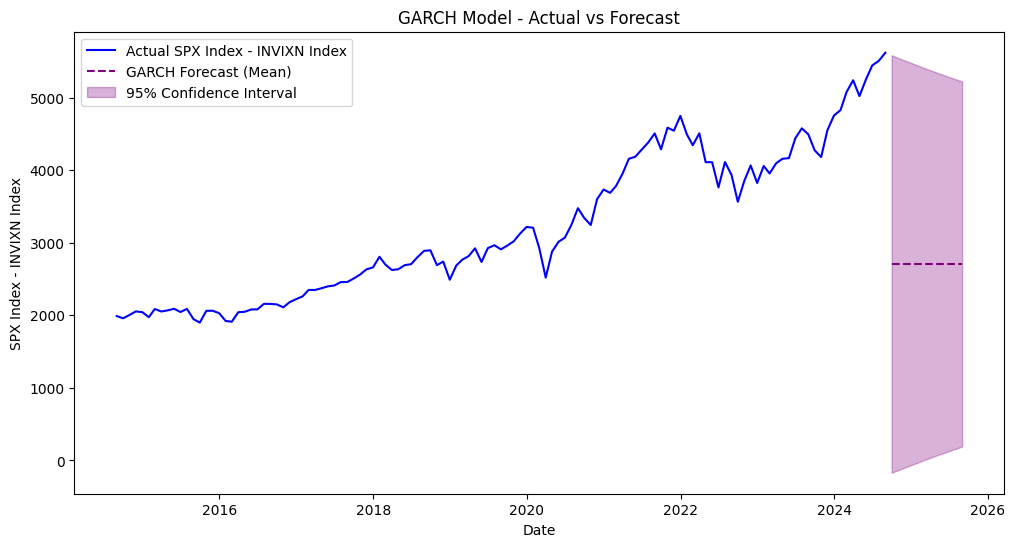

In [ ]:
# Plotting GARCH Forecast
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual SPX Index - INVIXN Index', color='blue')
plt.plot(garch_mean.index, garch_mean, label='GARCH Forecast (Mean)', color='purple', linestyle='--')
plt.fill_between(garch_mean.index,
                 garch_mean - garch_variance**0.5,
                 garch_mean + garch_variance**0.5,
                 color='purple', alpha=0.3, label='95% Confidence Interval')
plt.title('GARCH Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('SPX Index - INVIXN Index')
plt.legend()
plt.show()

In [ ]:
# Print GARCH Summary
print(garch_result.summary())


                        Constant Mean - GARCH Model Results                         
Dep. Variable:     SPX Index - INVIXN Index   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -950.072
Distribution:                        Normal   AIC:                           1908.14
Method:                  Maximum Likelihood   BIC:                           1919.33
                                              No. Observations:                  121
Date:                      Thu, Sep 05 2024   Df Residuals:                      120
Time:                              08:56:46   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

In [ ]:
# Compute In-Sample Errors
# Compute In-Sample Errors
fitted_values = garch_result.resid
in_sample_mse = mean_squared_error(y, fitted_values)
in_sample_rmse = np.sqrt(in_sample_mse)
in_sample_mae = mean_absolute_error(y, fitted_values)

In [ ]:
print(f"In-Sample MSE: {in_sample_mse:.4f}")
print(f"In-Sample RMSE: {in_sample_rmse:.4f}")
print(f"In-Sample MAE: {in_sample_mae:.4f}")

In-Sample MSE: 7331864.0667
In-Sample RMSE: 2707.7415
In-Sample MAE: 2707.7415


In [ ]:
# Compute Out-of-Sample Errors
# Align the forecast index with the actual data for comparison
actual_values = y[-forecast_steps:]  # Assuming you have actual values to compare

if len(actual_values) == len(forecast_index):
    forecast_mse = mean_squared_error(actual_values, garch_mean[:len(actual_values)])
    forecast_rmse = np.sqrt(forecast_mse)
    forecast_mae = mean_absolute_error(actual_values, garch_mean[:len(actual_values)])

    print(f"Forecast MSE: {forecast_mse:.4f}")
    print(f"Forecast RMSE: {forecast_rmse:.4f}")
    print(f"Forecast MAE: {forecast_mae:.4f}")
else:
    print("Length of actual values and forecast index do not match. Cannot compute forecast errors.")

Forecast MSE: 5372271.3783
Forecast RMSE: 2317.8161
Forecast MAE: 2273.3702


In [ ]:
# Retrieve AIC and BIC from the GARCH model results
aic = garch_result.aic
bic = garch_result.bic

print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")

AIC: 1908.1434
BIC: 1919.3266


# **ETS**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'df_new' is your DataFrame and 'SPX Index - INVIXN Index' is the column name
y = df_new['SPX Index - INVIXN Index']

# Split data into training and testing sets
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Fit ETS model
model = ExponentialSmoothing(df_new['SPX Index - INVIXN Index'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12)
fit = model.fit()



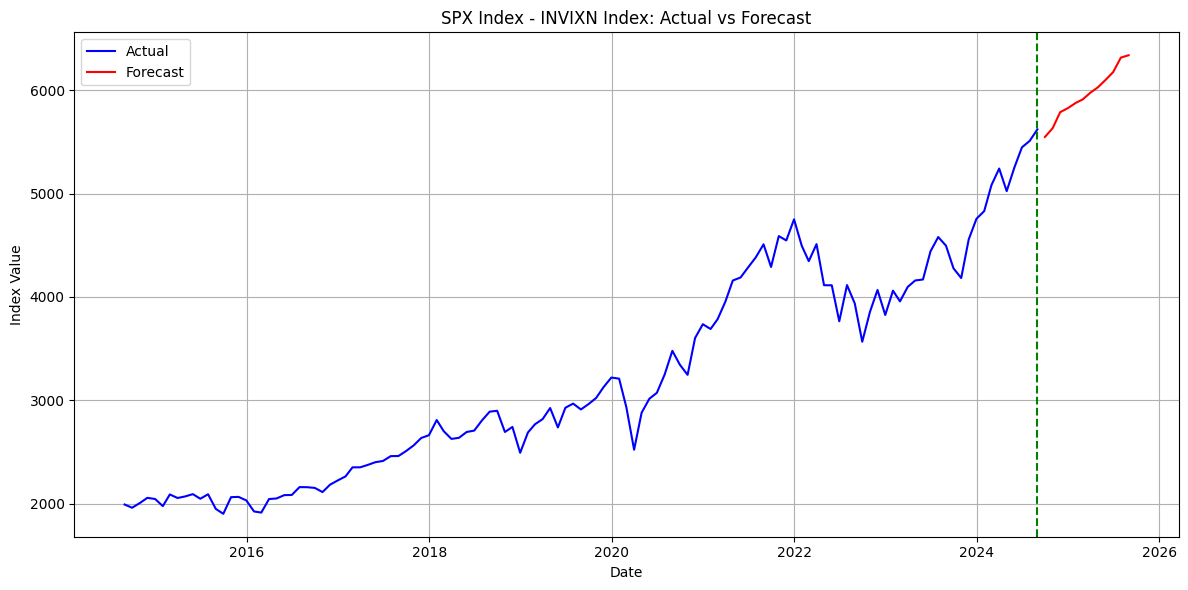

Forecast for September 2024 to August 2025:
               Forecast
2024-09-30  5547.125221
2024-10-31  5631.892590
2024-11-30  5787.169278
2024-12-31  5826.339374
2025-01-31  5876.224090
2025-02-28  5910.395694
2025-03-31  5975.947698
2025-04-30  6027.435350
2025-05-31  6100.203360
2025-06-30  6174.651033
2025-07-31  6315.599183
2025-08-31  6337.886690


In [ ]:
# Generate forecast for the next 12 months
forecast_horizon = 12
last_date = df_new.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_horizon, freq='M')
forecast = fit.forecast(forecast_horizon)

# Create a dataframe with the forecast
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_dates)

# Combine actual and forecast data
combined_df = pd.concat([df_new, forecast_df])

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(df_new.index, df_new['SPX Index - INVIXN Index'], label='Actual', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('SPX Index - INVIXN Index: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)

# Add vertical line to separate actual and forecast
plt.axvline(x=last_date, color='green', linestyle='--', label='Forecast Start')

plt.tight_layout()
plt.show()

# Print the forecast values
print("Forecast for September 2024 to August 2025:")
print(forecast_df)

In [ ]:


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate forecast for the test set
forecast = fit.forecast(len(y_test))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, forecast))
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)

# Calculate AIC and BIC
aic = fit.aic
bic = fit.bic

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")


RMSE: 3431.831372156087
MSE: 11777466.566914732
MAE: 3301.7269416471227
AIC: 1237.5211844530884
BIC: 1282.2538331826363
